Text(0, 0.5, 'Frecuencias')

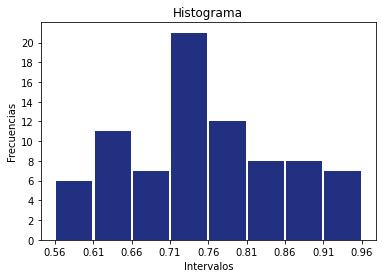

In [2]:
import DistribucionFrecuencias as DF
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

archivo = open('medidas.csv')
datos = []

for i in archivo:
    datos.append(float(i))

N = DF.NumeroDatos(datos)
maximo = max(datos)
minimo = min(datos)
R = DF.Rango(maximo,minimo)

K = DF.NumeroClases(N)
I = DF.IntervaloClases(R,K)

limites = DF.Limites(I,minimo,K)
frecuencia = DF.Contar(datos,limites,I,maximo)

eje_y = []

for i in range(0,max(frecuencia)+1):
    if i%2 == 0:
        eje_y.append(i)
    

plot.hist(x=datos,bins = K,rwidth=0.94,color='#223082')
plot.xticks(limites)
plot.yticks(eje_y)
plot.title('Histograma')
plot.xlabel('Intervalos')
plot.ylabel('Frecuencias')


,Clase,Intervalo,Marca de Clase,Frecuencia,Frecuencia Acumulada
0,1,0.56-0.61,0.585,6,6
1,2,0.61-0.66,0.635,11,17
2,3,0.66-0.71,0.685,7,24
3,4,0.71-0.76,0.735,21,45
4,5,0.76-0.81,0.785,12,57
5,6,0.81-0.86,0.835,8,65
6,7,0.86-0.91,0.885,8,73
7,8,0.91-0.96,0.935,7,80


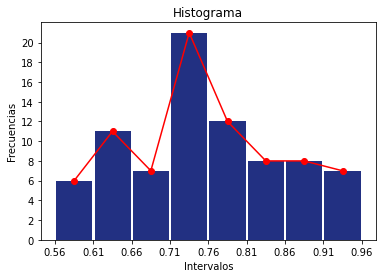

In [3]:
data_fr = []
data_fr = pd.DataFrame(data_fr)
clases = []
for i in range(1,K+1):
    clases.append(i)

data_fr['Clase'] = clases

intervalos = DF.Intervalos(limites)

data_fr['Intervalo'] = intervalos

marca_clase = DF.MarcaClase(limites)

data_fr['Marca de Clase'] = marca_clase

data_fr['Frecuencia'] = frecuencia

data_fr.head()

plot.hist(x=datos,bins = K,rwidth=0.94,color='#223082')
plot.xticks(limites)
plot.yticks(eje_y)
plot.title('Histograma')
plot.xlabel('Intervalos')
plot.ylabel('Frecuencias')
plot.plot(marca_clase,frecuencia,color='red',marker='o')

frecuencia_acumulada = DF.FrecuenciaAcumulada(frecuencia)
data_fr['Frecuencia Acumulada'] = frecuencia_acumulada
data_fr.head(10)

[0.61 0.66 0.71 0.76 0.81 0.86 0.91 0.96]


Text(0.5, 1.0, "'Ojiva menor que'")

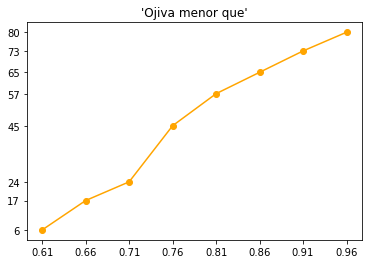

In [4]:
limites_ojivas = np.delete(limites,0)
print(limites_ojivas)

plot.plot(limites_ojivas,frecuencia_acumulada,color="orange",marker='o')
plot.xticks(limites_ojivas)
plot.yticks(frecuencia_acumulada)
plot.title("'Ojiva menor que'")

In [5]:
frecuencia_relativa = DF.FrecuenciaRelativa(frecuencia,N)

data_fr['Frecuencia Relativa (%)'] = frecuencia_relativa
data_fr.head()

,Clase,Intervalo,Marca de Clase,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa (%)
0,1,0.56-0.61,0.585,6,6,7.50
1,2,0.61-0.66,0.635,11,17,13.75
2,3,0.66-0.71,0.685,7,24,8.75
3,4,0.71-0.76,0.735,21,45,26.25
4,5,0.76-0.81,0.785,12,57,15.00


In [11]:
FRA = DF.FrecuenciaRelativaAcumulada(frecuencia_acumulada,N)
print(FRA)
data_fr['Frecuencia Relativa Acumulada (%)']=FRA
data_fr.head(10)

[7.5, 21.25, 30.0, 56.25, 71.25, 81.25, 91.25, 100.0]


,Clase,Intervalo,Marca de Clase,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa (%),Frecuencia Relativa Acumulada (%)
0,1,0.56-0.61,0.585,6,6,7.50,7.50
1,2,0.61-0.66,0.635,11,17,13.75,21.25
2,3,0.66-0.71,0.685,7,24,8.75,30.00
3,4,0.71-0.76,0.735,21,45,26.25,56.25
4,5,0.76-0.81,0.785,12,57,15.00,71.25
5,6,0.81-0.86,0.835,8,65,10.00,81.25
6,7,0.86-0.91,0.885,8,73,10.00,91.25
7,8,0.91-0.96,0.935,7,80,8.75,100.00


([<matplotlib.axis.YTick at 0x7faf2f48dee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

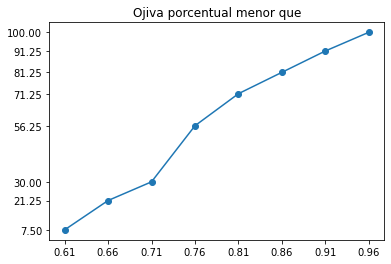

In [13]:
plot.plot(limites_ojivas,FRA,marker='o')
plot.title("Ojiva porcentual menor que")
plot.xticks(limites_ojivas)
plot.yticks(FRA)